In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [4]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | liaocheng
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | taburao
City not found. Skipping...
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | north bend
Processing Record 9 of Set 1 | hasaki
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | dingle
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | nikolskoye
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | navan
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | mayo
Processing Record 21 of Set 1 | geel

Processing Record 40 of Set 4 | maceio
Processing Record 41 of Set 4 | talnakh
Processing Record 42 of Set 4 | barrow
Processing Record 43 of Set 4 | plover
Processing Record 44 of Set 4 | kachiry
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | saleaula
City not found. Skipping...
Processing Record 47 of Set 4 | cacapava do sul
Processing Record 48 of Set 4 | chapais
Processing Record 49 of Set 4 | axim
Processing Record 50 of Set 4 | santa marta
Processing Record 1 of Set 5 | marrakesh
Processing Record 2 of Set 5 | praia da vitoria
Processing Record 3 of Set 5 | muroto
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | mogadishu
Processing Record 6 of Set 5 | comodoro rivadavia
Processing Record 7 of Set 5 | marienburg
Processing Record 8 of Set 5 | westport
Processing Record 9 of Set 5 | toppenish
Processing Record 10 of Set 5 | meyungs
City not found. Skipping...
Processing Record 11 of Set 5 | rawannawi
City not found. Skipping...
Processi

Processing Record 30 of Set 8 | pitimbu
Processing Record 31 of Set 8 | bernau
Processing Record 32 of Set 8 | manacapuru
Processing Record 33 of Set 8 | sistranda
Processing Record 34 of Set 8 | marcona
City not found. Skipping...
Processing Record 35 of Set 8 | warqla
City not found. Skipping...
Processing Record 36 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 37 of Set 8 | las vegas
Processing Record 38 of Set 8 | fonte boa
Processing Record 39 of Set 8 | oga
Processing Record 40 of Set 8 | quatre cocos
Processing Record 41 of Set 8 | deputatskiy
Processing Record 42 of Set 8 | beloha
Processing Record 43 of Set 8 | graham
Processing Record 44 of Set 8 | lekoni
Processing Record 45 of Set 8 | carmen
Processing Record 46 of Set 8 | naberera
Processing Record 47 of Set 8 | ignatovka
Processing Record 48 of Set 8 | mabaruma
Processing Record 49 of Set 8 | kamina
Processing Record 50 of Set 8 | lata
Processing Record 1 of Set 9 | forbes
Processing Record 2 of Set 9 |

Processing Record 18 of Set 12 | verkhneyarkeyevo
Processing Record 19 of Set 12 | qinhuangdao
Processing Record 20 of Set 12 | mata de sao joao
Processing Record 21 of Set 12 | grand-couronne
Processing Record 22 of Set 12 | tuy hoa
Processing Record 23 of Set 12 | arbon
Processing Record 24 of Set 12 | taoudenni
Processing Record 25 of Set 12 | merauke
Processing Record 26 of Set 12 | kharp
Processing Record 27 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 28 of Set 12 | sinnamary
Processing Record 29 of Set 12 | belaya gora
Processing Record 30 of Set 12 | cicero dantas
Processing Record 31 of Set 12 | mackay
Processing Record 32 of Set 12 | jalu
Processing Record 33 of Set 12 | niimi
Processing Record 34 of Set 12 | fairbanks
Processing Record 35 of Set 12 | lidkoping
Processing Record 36 of Set 12 | port macquarie
Processing Record 37 of Set 12 | zeya
Processing Record 38 of Set 12 | nome
Processing Record 39 of Set 12 | fomboni
Processing Record 40 of Set 1

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Liaocheng,36.44,115.96,56.98,34,0,14.90,CN,2020-04-23 23:17:08
1,Georgetown,5.41,100.34,78.80,94,20,3.36,MY,2020-04-23 23:14:20
2,Tuktoyaktuk,69.45,-133.04,-2.20,70,20,13.87,CA,2020-04-23 23:13:55
3,Kodiak,57.79,-152.41,42.80,87,90,9.17,US,2020-04-23 23:14:15
4,Mataura,-46.19,168.86,57.00,70,53,8.01,NZ,2020-04-23 23:13:53
5,North Bend,43.41,-124.22,64.99,71,1,9.17,US,2020-04-23 23:20:46
6,Hasaki,35.73,140.83,55.00,66,75,4.70,JP,2020-04-23 23:14:17
7,Busselton,-33.65,115.33,55.99,81,30,7.81,AU,2020-04-23 23:14:11
8,Yellowknife,62.46,-114.35,26.01,62,75,9.17,CA,2020-04-23 23:13:48
9,Cape Town,-33.93,18.42,63.00,77,95,5.82,ZA,2020-04-23 23:13:58


In [11]:
# Reorder columns for csv file
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp',
                                      'Humidity', 'Cloudiness', 'Wind Speed']

reordered_city_data_df = city_data_df[new_column_order]

reordered_city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Liaocheng,CN,2020-04-23 23:17:08,36.44,115.96,56.98,34,0,14.90
1,Georgetown,MY,2020-04-23 23:14:20,5.41,100.34,78.80,94,20,3.36
2,Tuktoyaktuk,CA,2020-04-23 23:13:55,69.45,-133.04,-2.20,70,20,13.87
3,Kodiak,US,2020-04-23 23:14:15,57.79,-152.41,42.80,87,90,9.17
4,Mataura,NZ,2020-04-23 23:13:53,-46.19,168.86,57.00,70,53,8.01


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

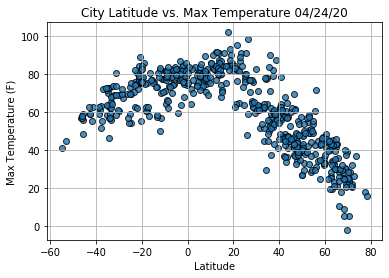

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

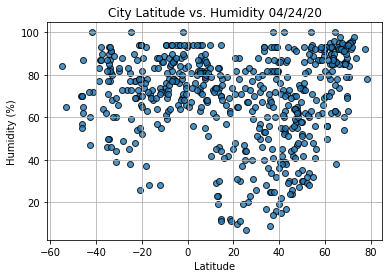

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

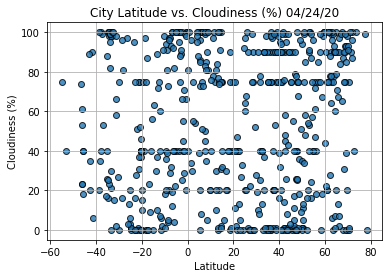

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

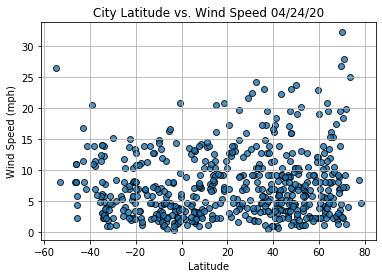

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()